Energies[0] = 1.000
Energies[1] = 3.999
Energies[2] = 8.994
Energies[3] = 15.980


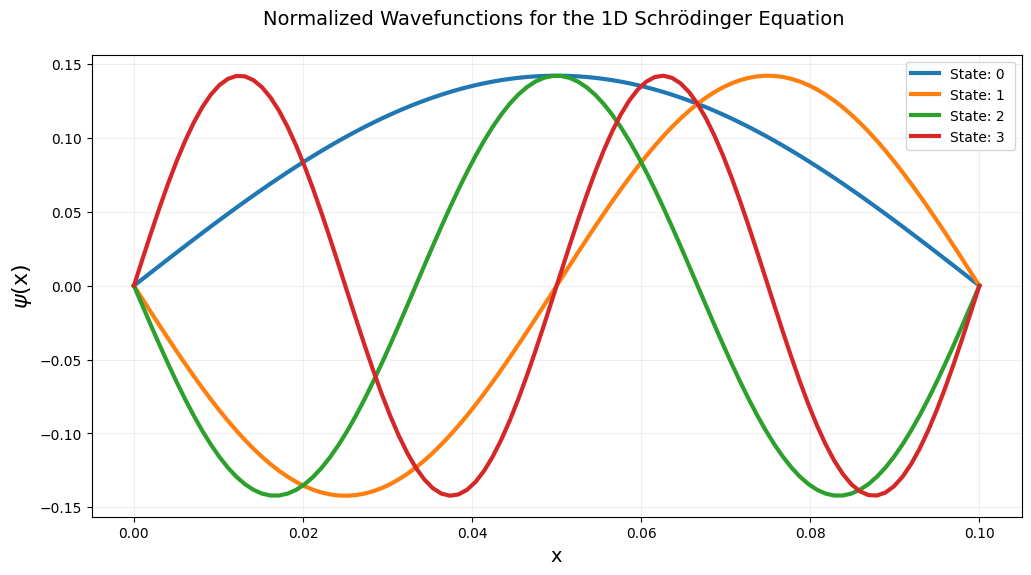

In [1]:
# ---------------------------------------------------------------------------
# Code to Solve the Schrodinger Equation
# Chapter 2 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
def Vpot(x):
    """ Potential Energy Function """
    return x**2
# ---------------------------------------------------------------------------

# Spatial grid parameters
x0 = 0.0 # [meter]
xN = 0.1 # [meter]
N  = 100 # Number of segments - Used to define the delta x (dx)

# Create x grid 
x = np.linspace(x0, xN, N)

# Define step size
dx = x[1] - x[0]

# Define the number of "waves" (States) we want to obtain in the solution
States = 4

# T: Kinetic Energy matrix

T = np.zeros((N-2)**2).reshape(N-2,N-2) 

# Account for the boundary condition
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

# V is the Potential Energy matrix
V = np.zeros((N-2)**2).reshape(N-2, N-2)

for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j] = Vpot(x[i+1])
        else:
            V[i,j] = 0

# Hamiltonian Matrix
# $ \LARGE H = -\frac{T}{2 \cdot dx^2} + V$
# 

# Hamiltonian matrix - Computing in vectorized form
H = -T / (2*dx**2) + V

# Solve to obtain the eigenvalues and eigenvectors
Eigval, Eigvec = np.linalg.eig(H)

# Sort eigenvalues and eigenvectors in ascending order
Eigval_ordered = np.argsort(Eigval)

# Limit the solution to the specified number of states (States)
z = Eigval_ordered[0:States]

Energies = (Eigval[z] / Eigval[z][0])

#print(Energies)
for i, E_i in enumerate(Energies):
    print(f"Energies[{i}] = {E_i:5.3f}")

# Plot 3 wavefunctions for the States – Not all states plotted

# Define the size of the plot
plt.figure(figsize=(12, 6))

# Loop to Plot each state in States
for i in range(States):  # for i in range(len(z))
    y = []
    y = np.append(y, Eigvec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x, y, lw=3, label="State: {} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)', size=16)

plt.legend()
plt.grid(alpha=0.2) # Schrödinger Equation
plt.title("Normalized Wavefunctions for the 1D Schrödinger Equation \n", size=14)
plt.show()
